In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec


In [2]:
raw_data = pd.read_csv('data.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 9144 non-null   object
 1   Price                 30360 non-null  object
 2   Address               30360 non-null  object
 3   Price per m2          12 non-null     object
 4   Area                  30358 non-null  object
 5   Bedrooms              20632 non-null  object
 6   Toilets               19720 non-null  object
 7   Published At          30360 non-null  object
 8   Diện tích             30358 non-null  object
 9   Mức giá               30360 non-null  object
 10  Hướng nhà             7640 non-null   object
 11  Hướng ban công        4677 non-null   object
 12  Ngày đăng             30360 non-null  object
 13  Ngày hết hạn          30360 non-null  object
 14  Loại tin              30360 non-null  object
 15  Mã tin                30360 non-null

In [4]:
unduplicated_data = raw_data.drop_duplicates(subset=['Mã tin'], keep='first')
unduplicated_data.loc[unduplicated_data[['Developer', 'Status']].isnull().all(axis=1), ['Developer', 'Status']] = ['cá nhân/môi giới', 'Đã bàn giao']
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 3838 non-null   object
 1   Price                 12446 non-null  object
 2   Address               12446 non-null  object
 3   Price per m2          1 non-null      object
 4   Area                  12445 non-null  object
 5   Bedrooms              8202 non-null   object
 6   Toilets               7805 non-null   object
 7   Published At          12446 non-null  object
 8   Diện tích             12445 non-null  object
 9   Mức giá               12446 non-null  object
 10  Hướng nhà             3131 non-null   object
 11  Hướng ban công        1828 non-null   object
 12  Ngày đăng             12446 non-null  object
 13  Ngày hết hạn          12446 non-null  object
 14  Loại tin              12446 non-null  object
 15  Mã tin                12446 non-null  obj

C:\Users\Khoa\AppData\Local\Temp\ipykernel_20364\1051689887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unduplicated_data.loc[unduplicated_data[['Developer', 'Status']].isnull().all(axis=1), ['Developer', 'Status']] = ['cá nhân/môi giới', 'Đã bàn giao']


In [5]:
unduplicated_data = unduplicated_data.drop(["Price per m2","Project Address", "Title", "Diện tích", "Mức giá", "Project Title", "Ngày hết hạn", "Number of Buildings", "Ngày đăng", "Mã tin"], axis="columns")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 12446 non-null  object
 1   Address               12446 non-null  object
 2   Area                  12445 non-null  object
 3   Bedrooms              8202 non-null   object
 4   Toilets               7805 non-null   object
 5   Published At          12446 non-null  object
 6   Hướng nhà             3131 non-null   object
 7   Hướng ban công        1828 non-null   object
 8   Loại tin              12446 non-null  object
 9   Status                12446 non-null  object
 10  Number of Apartments  3838 non-null   object
 11  Developer             12446 non-null  object
dtypes: object(12)
memory usage: 1.2+ MB


In [6]:
# unduplicated_data_2.head(30)
unduplicated_data = unduplicated_data[unduplicated_data["Price"] != "Thỏa thuận"]
unduplicated_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 11508 non-null  object
 1   Address               11508 non-null  object
 2   Area                  11507 non-null  object
 3   Bedrooms              7567 non-null   object
 4   Toilets               7208 non-null   object
 5   Published At          11508 non-null  object
 6   Hướng nhà             2957 non-null   object
 7   Hướng ban công        1725 non-null   object
 8   Loại tin              11508 non-null  object
 9   Status                11508 non-null  object
 10  Number of Apartments  3606 non-null   object
 11  Developer             11508 non-null  object
dtypes: object(12)
memory usage: 1.1+ MB


In [7]:
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới


In [8]:
# Chuyển đổi dữ liệu ở cột Area sang float
def convert_area_value(value):
    try: 
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Lọc bỏ các dấu chấm ở số hàng nghìn
            value = value.replace('m²', '').replace('.', '')

            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')
            
            return float(value)
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)

    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

unduplicated_data['Diện Tích'] = unduplicated_data['Area'].apply(convert_area_value)

Lỗi khi xử lý giá trị: Area. Chi tiết lỗi: could not convert string to float: 'Area'


In [9]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 11508 non-null  object 
 1   Address               11508 non-null  object 
 2   Area                  11507 non-null  object 
 3   Bedrooms              7567 non-null   object 
 4   Toilets               7208 non-null   object 
 5   Published At          11508 non-null  object 
 6   Hướng nhà             2957 non-null   object 
 7   Hướng ban công        1725 non-null   object 
 8   Loại tin              11508 non-null  object 
 9   Status                11508 non-null  object 
 10  Number of Apartments  3606 non-null   object 
 11  Developer             11508 non-null  object 
 12  Diện Tích             11506 non-null  float64
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [10]:
# Hàm chuyển đổi giá trị thành tỷ với xử lý trường hợp "triệu/m²"
def convert_to_billion(value, area):
    try:
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')

            # Dữ liệu chỉ đánh giá các bds rao bán nên sẽ không xử lý các bds cho thuê
            if '/tháng' in value:
                return None
            
            # Kiểm tra nếu có "triệu/m²"
            elif 'triệu/m²' in value:
                price_per_sqm = float(value.replace(' triệu/m²', '')) / 1000  # Đổi từ triệu/m² thành tỷ/m²
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Kiểm tra nếu có "triệu/m²"
            elif 'tỷ/m²' in value:
                price_per_sqm = float(value.replace(' tỷ/m²', ''))
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Xử lý các trường hợp có đơn vị "tỷ" hoặc "triệu"
            elif 'tỷ' in value:
                return float(value.replace(' tỷ', ''))
            
            # Chuyển "triệu" thành "tỷ"
            elif 'triệu' in value:
                return float(value.replace(' triệu', '')) / 1000  
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)
        
        return None
        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

# Áp dụng hàm vào cột 'giá_cả' và truyền thêm cột 'diện_tích' để tính giá trị cuối cùng
unduplicated_data['Giá'] = unduplicated_data.apply(lambda row: convert_to_billion(row['Price'], row['Diện Tích']), axis=1)

In [11]:
unduplicated_data = unduplicated_data.dropna(subset=["Giá"])
unduplicated_data.head()

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới,40.0,15.20
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,60.0,12.35
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35


In [12]:
unduplicated_data["Triệu/m2"] = (unduplicated_data["Giá"] / unduplicated_data["Diện Tích"] * 1000).round(1)
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá,Triệu/m2
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới,40.0,15.20,380.0
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60,62.2
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00,80.5
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,60.0,12.35,205.8
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35,23.7
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,100.0,7.80,78.0
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group,87.0,5.95,68.4
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới,156.0,16.00,102.6
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,34.0,8.60,252.9
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,80.0,8.70,108.7


In [13]:
unduplicated_data["Ngày đăng"] = pd.to_datetime(unduplicated_data["Published At"], format="%d/%m/%Y")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, 0 to 30359
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 11498 non-null  object        
 1   Address               11498 non-null  object        
 2   Area                  11498 non-null  object        
 3   Bedrooms              7559 non-null   object        
 4   Toilets               7200 non-null   object        
 5   Published At          11498 non-null  object        
 6   Hướng nhà             2956 non-null   object        
 7   Hướng ban công        1723 non-null   object        
 8   Loại tin              11498 non-null  object        
 9   Status                11498 non-null  object        
 10  Number of Apartments  3601 non-null   object        
 11  Developer             11498 non-null  object        
 12  Diện Tích             11498 non-null  float64       
 13  Giá                  

In [14]:
def convert_the_number_of_rooms(value):
    try:
        if isinstance(value, str):
            if "phòng" in value:
                value = value.replace(" phòng", "")
                return float(value)
            else: return None
        elif isinstance (value, (int, float)):
            return float(value)
        return None
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị {value}, chi tiết lỗi {e}")
        return None
    
unduplicated_data["Số Phòng Ngủ"] = unduplicated_data["Bedrooms"].apply(convert_the_number_of_rooms)
unduplicated_data["Số Nhà Vệ Sinh"] = unduplicated_data["Toilets"].apply(convert_the_number_of_rooms)

In [15]:
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới,40.0,15.20,380.0,2024-10-17,6.0,4.0
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,90.0,5.60,62.2,2024-10-23,3.0,2.0
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,87.0,7.00,80.5,2024-10-23,2.0,2.0
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,60.0,12.35,205.8,2024-10-22,4.0,NaN
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,57.0,1.35,23.7,2024-10-17,2.0,2.0
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,100.0,7.80,78.0,2024-10-22,3.0,3.0
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group,87.0,5.95,68.4,2024-10-15,3.0,2.0
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đã bàn giao,NaN,cá nhân/môi giới,156.0,16.00,102.6,2024-10-17,8.0,9.0
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,34.0,8.60,252.9,2024-10-22,3.0,4.0
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,Đã bàn giao,NaN,cá nhân/môi giới,80.0,8.70,108.7,2024-10-04,4.0,5.0


In [16]:
gbd_path = './gbd.csv'
df_gbd = pd.read_csv(gbd_path)
df_gbd['Tên đường'] = df_gbd['TÊN ĐƯỜNG'].str.lower()
df_gbd['Quận'] = df_gbd['QUẬN'].str.lower()
# Giá trung bình của đất nơi dự án
def calculate_avg_district_prices(df_gbd):
    district_avg_prices = {}

    # Group by district and calculate the average of 'Giá đất đề nghị điều chỉnh'
    for district in df_gbd['Quận'].unique():
        # Filter data for the district
        district_data = df_gbd[df_gbd['Quận'] == district].copy()
        
        # Ensure 'Giá đất đề nghị điều chỉnh' is numeric and calculate the average
        district_data.loc[:, 'Giá đất đề nghị điều chỉnh'] = pd.to_numeric(district_data['Giá đất đề nghị điều chỉnh'], errors='coerce')
        
        # Calculate the average price for the district
        avg_price = district_data['Giá đất đề nghị điều chỉnh'].mean()
        district_avg_prices[district] = avg_price

    return district_avg_prices


district_avg_prices = calculate_avg_district_prices(df_gbd)
district_avg_prices

{'bình chánh': 25803.571428571428,
 'bình thạnh': 105035.10638297872,
 'bình tân': 45781.513083048914,
 'cần giờ': 7238.851851851853,
 'củ chi': 8990.760869565218,
 'gò vấp': 70582.75862068965,
 'hóc môn': 20194.915254237287,
 'nhà bè': 32532.196969696968,
 'phú nhuận': 124477.19298245614,
 'quận 1': 267213.53383458644,
 'quận 10': 131008.0,
 'quận 11': 115061.30136986301,
 'quận 12': 44303.08641975309,
 'quận 2': 59327.65113974232,
 'quận 3': 213742.85714285713,
 'quận 4': 138849.38271604938,
 'quận 5': 139679.38144329897,
 'quận 6': 92683.33333333333,
 'quận 7': 80628.373015873,
 'quận 8': 61907.186544342505,
 'quận 9': 59327.65113974232,
 'thủ đức': 59327.65113974232,
 'tân bình': 101933.79629629629,
 'tân phú': 74354.52755905512}

In [17]:
def contains_hcm_and_district(address, district):
    # Ensure that we are checking if the district and either Hồ Chí Minh or Thủ Đức appear in the address
    return district.lower() in address.lower() and ('hồ chí minh' in address.lower() or 'thủ đức' in address.lower())

def assign_district_price(row):
    # Normalize address to lowercase
    address = row['Address'].lower()
    street_match = df_gbd[df_gbd['Tên đường'].apply(lambda x: x.lower() in address)]
    print(f"Processing address: {address}, {len(street_match)}")  # Debug print for address
    
    for idx, match in street_match.iterrows():
        street_name = match['Tên đường'].lower()
        district = match['Quận'].lower()

        if district in ['Thủ Đức']:
            print(f"District {district} is a sub-district of Thủ Đức, checking street match...")
            price = match['Giá đất đề nghị điều chỉnh']
            return 'thủ đức', price, street_name

        if street_name in address and district in address:
            print(f"Found exact match: Street = {street_name}, District = {district}")
            price = match['Giá đất đề nghị điều chỉnh']
            return district, price, street_name

    for district in district_avg_prices:
        if contains_hcm_and_district(address, district):
            price = district_avg_prices[district]
            print(f"Price found for district {district}: {price}")
            return district, price, None

    print(f"No match found for address: {address}")
    return None, None, None

unduplicated_data[['Quận', 'Giá Đề Xuất', 'Đường']] = unduplicated_data.apply(lambda row: pd.Series(assign_district_price(row)), axis=1)
unduplicated_data = unduplicated_data[unduplicated_data['Giá Đề Xuất'].notna()]
unduplicated_data.head(10000).to_csv('new_data.csv', index=False)

Processing address: đường dương bá trạc, phường 2, quận 8, hồ chí minh, 2
Found exact match: Street = dương bá trạc, District = quận 8
Processing address: screc tower, đường trường sa, phường 12, quận 3, hồ chí minh, 3
Found exact match: Street = trường sa, District = quận 3
Processing address: dự án hado centrosa garden, đường 3/2, phường 12, quận 10, hồ chí minh, 1
Price found for district quận 1: 267213.53383458644
Processing address: đường nguyễn trãi, phường 7, quận 5, hồ chí minh, 3
Found exact match: Street = nguyễn trãi, District = quận 5
Processing address: dự án dream home riverside, đường nguyễn văn linh, phường 7, quận 8, hồ chí minh, 4
Found exact match: Street = nguyễn văn linh, District = quận 8
Processing address: đường phạm văn bạch, phường 15, tân bình, hồ chí minh, 3
Found exact match: Street = phạm văn bạch, District = tân bình
Processing address: dự án icon 56, đường bến vân đồn, phường 12, quận 4, hồ chí minh, 5
Found exact match: Street = bến vân đồn, District = 

In [18]:
# Xử lý số lượng các căn hộ
def handle_number_of_apartment(value):
    try:
        if isinstance(value, str):
            # Kiểm tra và loại bỏ các chuỗi chứa đơn vị không hợp lệ
            if "m²" in value or "-" in value or not value.replace(".", "").isdigit():
                return None
            # Loại bỏ dấu chấm để xử lý: "1.000" --> 1000
            value = value.replace(".", "")
            return int(value)
        # Nếu giá trị đã là số (int hoặc float), chuyển thành int và trả về
        elif isinstance(value, (int, float)):
            return int(value)
        # Trả về None nếu không phải chuỗi, int, hoặc float
        return None        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

# Áp dụng vào trong tập dữ liệu để xử lý thông số số lượng căn hộhộ
unduplicated_data["Số Căn Hộ"] = unduplicated_data["Number of Apartments"].apply(handle_number_of_apartment)

Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float NaN to integer
Lỗi khi xử lý giá trị: nan. Chi tiết lỗi: cannot convert float N

In [19]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 10306 non-null  object        
 1   Address               10306 non-null  object        
 2   Area                  10306 non-null  object        
 3   Bedrooms              6922 non-null   object        
 4   Toilets               6614 non-null   object        
 5   Published At          10306 non-null  object        
 6   Hướng nhà             2556 non-null   object        
 7   Hướng ban công        1499 non-null   object        
 8   Loại tin              10306 non-null  object        
 9   Status                10306 non-null  object        
 10  Number of Apartments  3180 non-null   object        
 11  Developer             10306 non-null  object        
 12  Diện Tích             10306 non-null  float64       
 13  Giá                  

In [20]:
unduplicated_data.describe()

,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh,Giá Đề Xuất,Số Căn Hộ
count,10306.000000,10306.000000,10306.000000,10306,6922.000000,6614.000000,10306.000000,943.000000
mean,196.938193,21.941236,139.606821,2024-10-23 10:03:03.039006464,4.095926,3.866042,111625.561132,1968.620361
min,7.000000,0.001050,0.000000,2024-09-27 00:00:00,1.000000,1.000000,4250.000000,2.000000
25%,64.000000,4.400000,57.900000,2024-10-23 00:00:00,2.000000,2.000000,59327.651140,436.000000
50%,88.750000,8.800000,100.000000,2024-10-24 00:00:00,3.000000,3.000000,85100.000000,900.000000
75%,143.000000,20.800000,171.975000,2024-10-26 00:00:00,4.000000,5.000000,137400.000000,1720.000000
max,40000.000000,900.000000,8800.000000,2024-10-31 00:00:00,200.000000,115.000000,687200.000000,13000.000000
std,925.108149,47.792626,173.763595,NaN,5.784158,4.795742,77437.532084,3171.559681


In [21]:
# Việt hóa
unduplicated_data["Chủ Đầu Tư"] = unduplicated_data["Developer"]
unduplicated_data["Trạng Thái"] = unduplicated_data["Status"]

In [22]:
# Drop các cột dư thừa sau khi Việt hóa
unduplicated_data = unduplicated_data.drop(["Area", "Price", "Address", "Bedrooms", "Toilets", "Published At", "Developer", "Status", "Number of Apartments"], axis="columns")

In [23]:
# # Code xử lý loại bỏ các ngoại lai quá lớn có thể ảnh hưởng đến dữ liệu
# # Tính Q1, Q3 và IQR của cột Giá
# Q1_price = unduplicated_data['Giá'].quantile(0.25)
# Q3_price = unduplicated_data['Giá'].quantile(0.75)
# IQR_price = Q3_price - Q1_price

# # Tính Q1, Q3 và IQR của cột Diện Tích
# Q1_area = unduplicated_data['Diện Tích'].quantile(0.25)
# Q3_area = unduplicated_data['Diện Tích'].quantile(0.75)
# IQR_area = Q3_area - Q1_area


# # Lọc các giá trị không phải là ngoại lai
# df_no_outliers = unduplicated_data[(unduplicated_data['Diện Tích'] >= Q1_area - 1.5 * IQR_area) & (unduplicated_data['Diện Tích'] <= Q3_area + 1.5 * IQR_area)]
# df_no_outliers = df_no_outliers[(df_no_outliers['Giá'] >= Q1_price - 1.5 * IQR_price) & (df_no_outliers['Giá'] <= Q3_price + 1.5 * IQR_price)]

In [24]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 30359
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hướng nhà       2556 non-null   object        
 1   Hướng ban công  1499 non-null   object        
 2   Loại tin        10306 non-null  object        
 3   Diện Tích       10306 non-null  float64       
 4   Giá             10306 non-null  float64       
 5   Triệu/m2        10306 non-null  float64       
 6   Ngày đăng       10306 non-null  datetime64[ns]
 7   Số Phòng Ngủ    6922 non-null   float64       
 8   Số Nhà Vệ Sinh  6614 non-null   float64       
 9   Quận            10306 non-null  object        
 10  Giá Đề Xuất     10306 non-null  float64       
 11  Đường           7727 non-null   object        
 12  Số Căn Hộ       943 non-null    float64       
 13  Chủ Đầu Tư      10306 non-null  object        
 14  Trạng Thái      10306 non-null  object        
dtypes: date

# B. EDA - Khám phá dữ liệu

## I. Các thống kê về số lượng bất động sản

### 1. Thống kê về tổng số lượng bất động sản được rao bán của từng quận/huyện

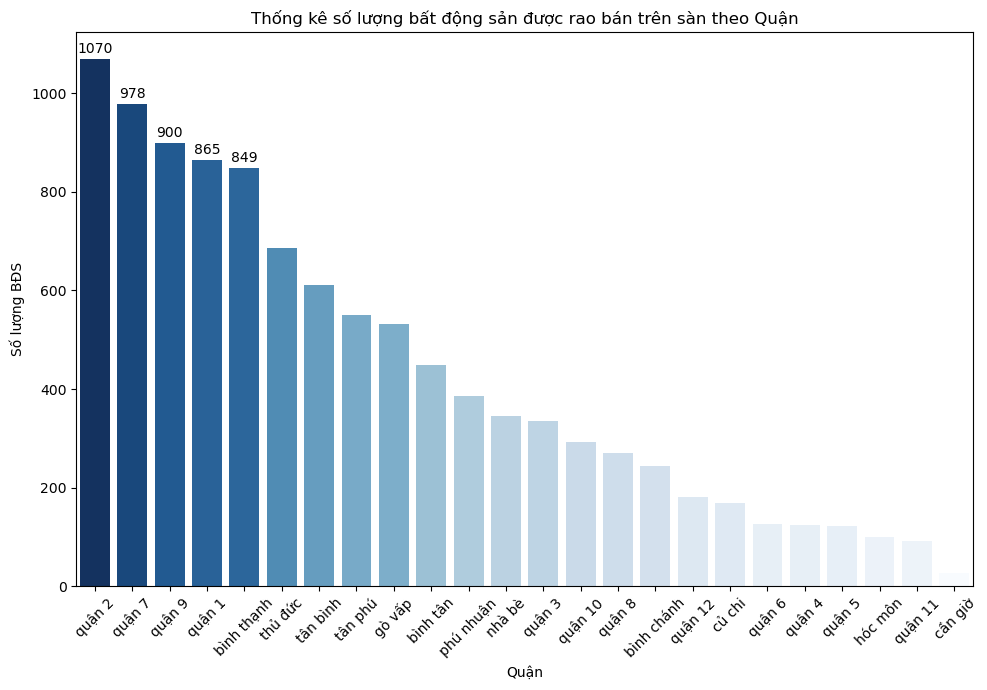

In [25]:
# Đếm số lượng BĐS trong mỗi quận
district_counts = unduplicated_data['Quận'].value_counts().reset_index()
district_counts.columns = ['Quận', 'Số lượng BĐS']

# Xử lý để colormap
norm = plt.Normalize(min(district_counts["Số lượng BĐS"]), max(district_counts["Số lượng BĐS"])) # Chuaarn hoas duwx lieeuj
colors = list(cm.Blues(norm(district_counts["Số lượng BĐS"])))  # Ánh xạ dữ liệu vào hệ màu Blues, palette không hỗ trợ numpy array
                                                                # nên phải chuyển sang list

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=district_counts, x='Quận', y='Số lượng BĐS', palette=colors, hue='Quận', legend=False)

# Thêm số lên cột
for i, p in enumerate(ax.patches):
    if district_counts['Số lượng BĐS'][i] >= 800:  # Điều kiện
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10)
    
plt.title('Thống kê số lượng bất động sản được rao bán trên sàn theo Quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Nhận xét:**
- Dựa vào thống kê, chúng ta dễ dàng nhận ra các quận trung tâm như quận 1, 2, 7, 9, Bình Thạnh là các các quận có thị trường bất động sản sôi nổi nhất khu vực thành phố Hồ Chí Minh khi có từ hơn 600 đến hơn 1000 bất động sản được rao bán trong từng quận. 

- Mặt khác, các quận/huyện ngoài rìa như huyện Hóc Môn, Cần Giờ, Củ Chi, Quận 11 là các quận ảm đạm về thị trường bất động sản nhất khi chỉ có dưới 200 bất động sản được đang bán trong thời gian của dữ liệu đăng bán.

- Dễ dàng nhận thấy chính sách thành lập thành phố Thủ Đức trực thuộc thành phố Hồ Chí Minh mang lại những tín hiệu tích cực rõ rệt trên thị trường bất động sản khi cả 3 quận thành viên của thành phố Thủ Đức lần lượt đều đứng top đầu trong số các quận có nhiều bất động sản được đăng bán nhất, cụ thể:
    - Quận 2 với 1070 BDS (top 1)
    - Quận 9 với 900 BDS (top 3)
    - Quận Thủ Đức với 687 BDS (top 6)

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

### 2. Thống kê số lượng bất động sản được rao bán theo thời gian thống kê

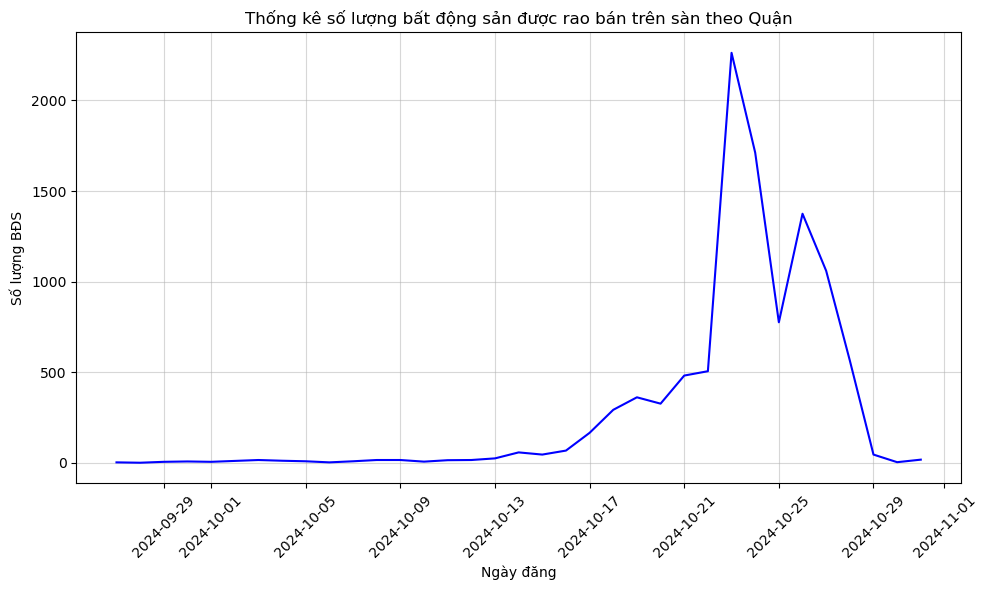

In [26]:
# Đếm số lượng BĐS trong mỗi quận
date_counts = unduplicated_data['Ngày đăng'].value_counts().reset_index()
date_counts.columns = ['Ngày đăng', 'Số lượng BĐS']

# Sắp xếp dữ liệu theo ngày
date_counts = date_counts.sort_values(by='Ngày đăng')

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=date_counts, x='Ngày đăng', y='Số lượng BĐS', color="blue")
plt.title('Thống kê số lượng bất động sản được rao bán trên sàn theo Quận')
plt.xlabel('Ngày đăng')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

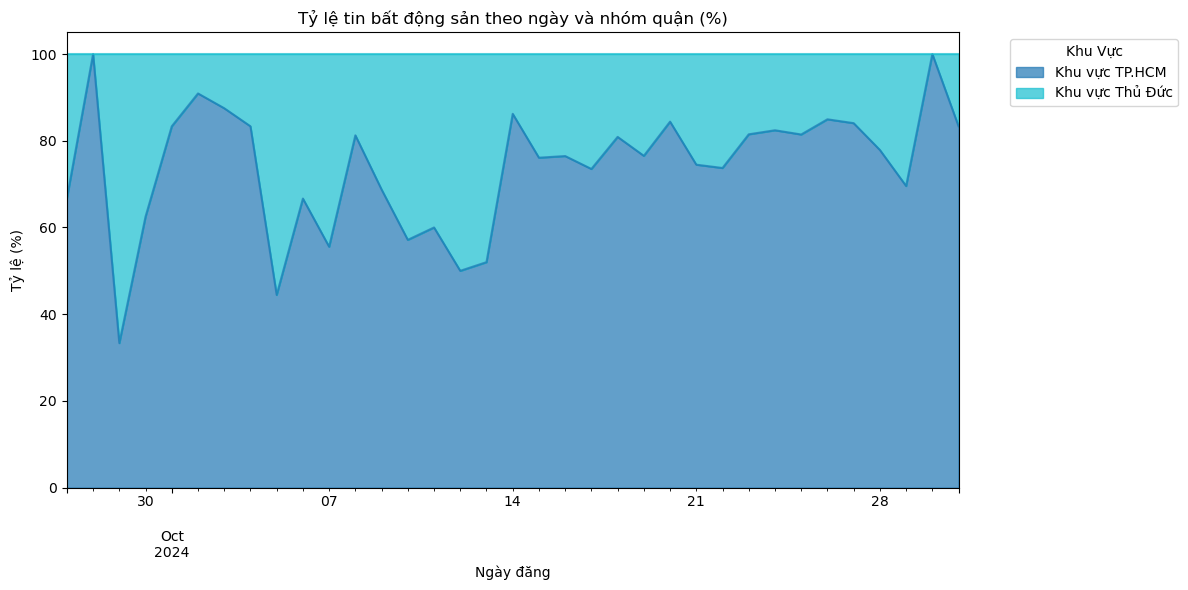

In [27]:
# Danh sách các quận chính
main_districts = [
    "quận 1", "quận 2", "quận 7", "quận 9", 
    "bình thạnh", "thủ đức", 
    "tân bình", "tân phú"
]

# Danh sách quận thuộc khu vực Thủ Đức
thu_duc_districts = ["quận 2", "quận 9", "quận thủ đức"]

# Gộp nhóm các khu vực
unduplicated_data["Khu vực"] = unduplicated_data["Quận"].apply(
    lambda x: "Khu vực Thủ Đức" if x in thu_duc_districts else "Khu vực TP.HCM"
)

# Gom nhóm theo "Ngày đăng" và "Nhóm quận", đếm số lượng tin bất động sản
grouped_data = unduplicated_data.groupby(["Ngày đăng", "Khu vực"]).size().reset_index(name="Số lượng")

# Pivot table để chuẩn bị dữ liệu
pivot_data = grouped_data.pivot(index="Ngày đăng", columns="Khu vực", values="Số lượng").fillna(0)

# Tính phần trăm trên mỗi hàng
percent_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ miền
plt.figure(figsize=(12, 6))
percent_data.plot(kind='area', stacked=True, alpha=0.7, figsize=(12, 6), cmap="tab10")
plt.title("Tỷ lệ tin bất động sản theo ngày và nhóm quận (%)")
plt.xlabel("Ngày đăng")
plt.ylabel("Tỷ lệ (%)")
plt.legend(title="Khu Vực", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Nhận xét:**
- Số lượng bất động sản được rao bán trên sàn batdongsan.com ghi nhận một sự tăng trưởng đáng kể trong thời gian gần cuối năm.

- Khu vực thành phố Hồ Chí Minh ghi nhận một xu hướng tăng nhẹ về tổng số lượng tin bất động sản được đăng bán thời điểm cuối năm khi so với khu vực Thủ Đức

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

## II. Một số các thống kê khác

### 1. Phân bổ bất động sản theo các khoảng giá

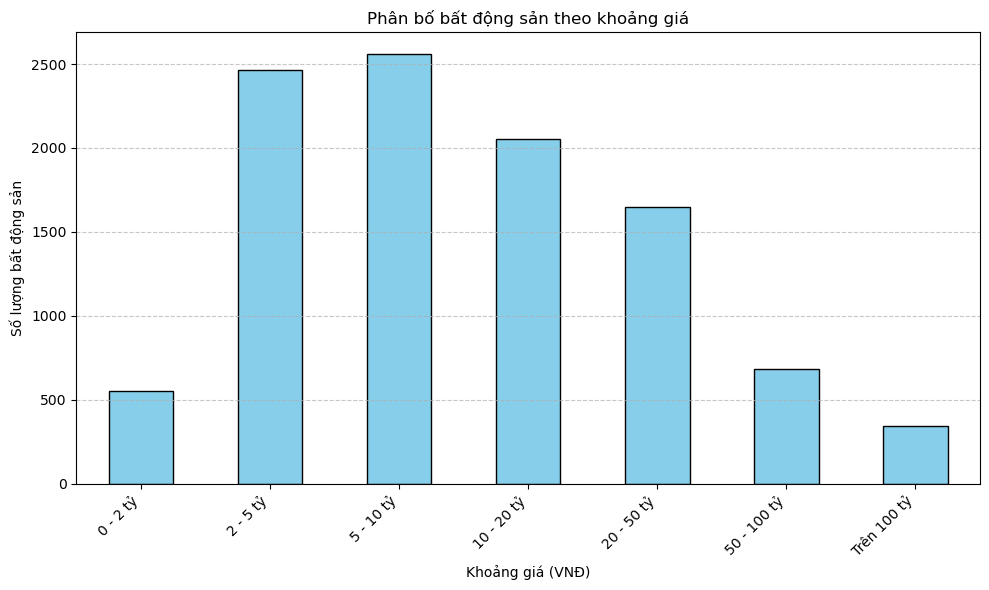

In [28]:
# Định nghĩa các khoảng giá và gắn nhãn
bins = [0, 2, 5, 10, 20, 50, 100, float('inf')]  # Các khoảng giá (tính bằng đồng)
labels = [
    "0 - 2 tỷ", "2 - 5 tỷ", "5 - 10 tỷ", "10 - 20 tỷ", 
    "20 - 50 tỷ", "50 - 100 tỷ", "Trên 100 tỷ"
]

# Phân loại giá trị
unduplicated_data["Khoảng giá"] = pd.cut(unduplicated_data["Giá"], bins=bins, labels=labels, right=False)

# Đếm số lượng bất động sản thuộc mỗi khoảng
price_distribution = unduplicated_data["Khoảng giá"].value_counts(sort=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
price_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Phân bố bất động sản theo khoảng giá")
plt.xlabel("Khoảng giá (VNĐ)")
plt.ylabel("Số lượng bất động sản")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Dữ liệu cho thấy phần đông các bất động sản có giá trị từ trung bình đến cao cấp, cụ thể:
    - Các bất động sản tập trung nhiều nhất ở khoảng giá từ 2 - 10 tỷ, cho thấy các thị trường tập trung phần lớn vào tầng lớp trung lưu, nơi đang có sự mở rộng nhanh tại thành phố Hồ Chí Minh nhờ sự phát triển kinh tế mạnh mẽ vào nhiều năm trở lại đây.
    - Sự phân bổ các bất động sản có phần giảm dần ở phân khúc cao hơn 10 tỷ, nhưng vẫn ở mức cao cho thấy tầng lớp thượng lưu tai thành phố Hồ Chí Minh cũng là nhóm khách hàng mà thị trường đang dần hướng tới.
- Số liệu về các bất động sản thuộc mức giá trị thấp và siêu cao chỉ chiếm thiểu số
    - Các bất động sản thuộc phân khúc thấp chiếm phần ít nhất khi chỉ có hơn 500 bất động sản được rao bán, điều này cho thấy giá đất đai và chi phí xây dựng cao khiến việc cung cấp một bất động sản có giá trị thấp ngày càng xa vời và thành phố đang thiếu các chính sách hỗ trợ để những người có thu nhập phổ thông có khả năng có nhà tại thành phố.
    - Mặc dù các bất động sản có giá siêu cao chỉ chiếm số ít nhưng lại cao hơn khu vực bất động sản giá thấp, cho thấy thị trường này vẫn rất tìm năng đối với các chủ đầu tư bất động sản.


*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

### 2. Thị phần bất động sản của các nhóm bất động sản

In [29]:
# Xử lý dữ liệu trước khi vẽ biểu đồ 
# Tạo cột "Loại chủ đầu tư" để phân nhóm
unduplicated_data["Chủ Đầu Tư"] = unduplicated_data["Chủ Đầu Tư"].str.lower()
unduplicated_data["Loại Chủ Đầu Tư"] = unduplicated_data["Chủ Đầu Tư"].apply(
    lambda x: "công ty" if x != "cá nhân/môi giới" else "cá nhân/môi giới"
)


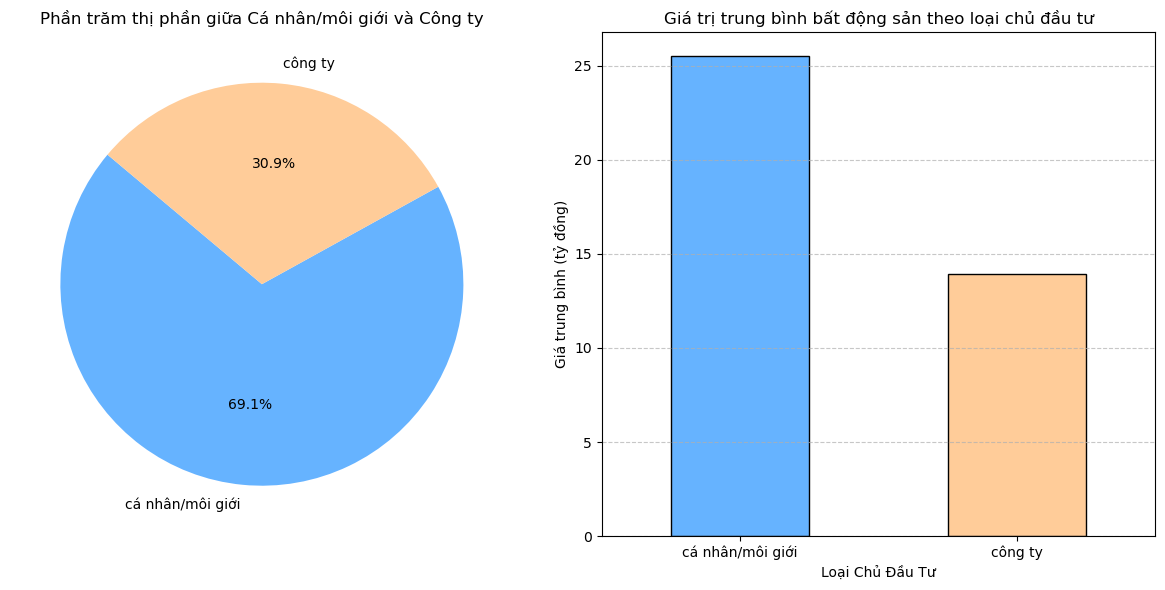

In [30]:

# 1. Tính phần trăm thị phần
market_share = unduplicated_data["Loại Chủ Đầu Tư"].value_counts(normalize=True) * 100

# 2. Tính giá trị trung bình và vẽ biểu đồ cột
avg_price = unduplicated_data.groupby("Loại Chủ Đầu Tư")["Giá"].mean()

# Vẽ hai biểu đồ (thị phần và giá trị trung bình) 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Biểu đồ tròn thị phần (biểu đồ 1)
axes[0].pie(
    market_share, 
    labels=market_share.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=["#66b3ff", "#ffcc99"]
)
axes[0].set_title("Phần trăm thị phần giữa Cá nhân/môi giới và Công ty")

# Biểu đồ cột giá trị trung bình (biểu đồ 2)
avg_price.plot(
    kind="bar", 
    color=["#66b3ff", "#ffcc99"], 
    edgecolor="black", 
    ax=axes[1]
)
axes[1].set_title("Giá trị trung bình bất động sản theo loại chủ đầu tư")
axes[1].set_ylabel("Giá trung bình (tỷ đồng)")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].set_xticklabels(avg_price.index, rotation=0)

plt.tight_layout()
plt.show()


**Nhận xét:**
- Dữ liệu thống kê được phần lớn các bất động sản được rao bán là thuộc quản lý tư nhân hoặc môi giới:
    - Điều này không đồng nghĩa với việc số lượng bất động sản thực tế trên thị trường chiếm số đông ở cá nhân và môi giới, vì các công ty/tập đoàn bất động sản lớn thường rao bán trên nhiều kênh khác nhau mà chủ yếu là trên trang web chính thức của họ, do đó số liệu trên sàn tập trung này sẽ không nhiều bằng cá nhân và môi giới hay nói cách khác các sàn bất động sản tập trung không phải là kênh chính của các tập đoàn lớn
    - Đồng nghĩa với việc các sàn online tập trung như batdongsan.com là kênh chính của các nhà bất động sản "cá nhân/môi giới"

- Giá trị trung bình của các động sản cá nhân cao hơn rất nhiều (gần gấp đôi) so với các bất động sản thuộc diện công ty/tập đoàn bất động sản.
    - Các công ty/tập đoàn bất động sản thường hướng tới việc phục vụ cho nhu cầu số đông của các cá nhân nhân trên thị trường, do đó các bất động sản của họ thưòng có mức giá được cho là dễ tiếp cận hơn cho toàn thể dân cư so với các bất động sản cá nhân.
    - Các cá nhân/môi giới có giá trị trung bình của các bất động sản cao hơn có thể do sự cấu thành của nhiều lý do:
        - Khác với các bất động sản công ty/tập đoàn thường cố định theo mức giá đã được đề ra, các bất động sản cá nhân thường phải thông qua thương lượng để chốt được mức giá hợp lý, do đó các cá nhân thường đẩy giá cao hơn so với mức giá trị chính xác của BDS dẫn tới mức giá trung bình trên sàn thương mại cao hơn.
        - Các biệt thự các mức giá trị cao thường được rao bán dưới dạng cá nhân/môi giới, do đó nó cũng góp phần làm tăng mức giá trung bình của nhóm BDS này.

*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

### 3. Thị phần BDS của thành phần các công ty BDS

In [31]:
def handle_name_of_developers(value):
    try:
        # Thay thế "Công ty" thành "CT" và "Cổ phần" thành "CP"
        value = value.replace("công ty", "CT").replace("cổ phần", "CP")
        return value
    except:
        return value


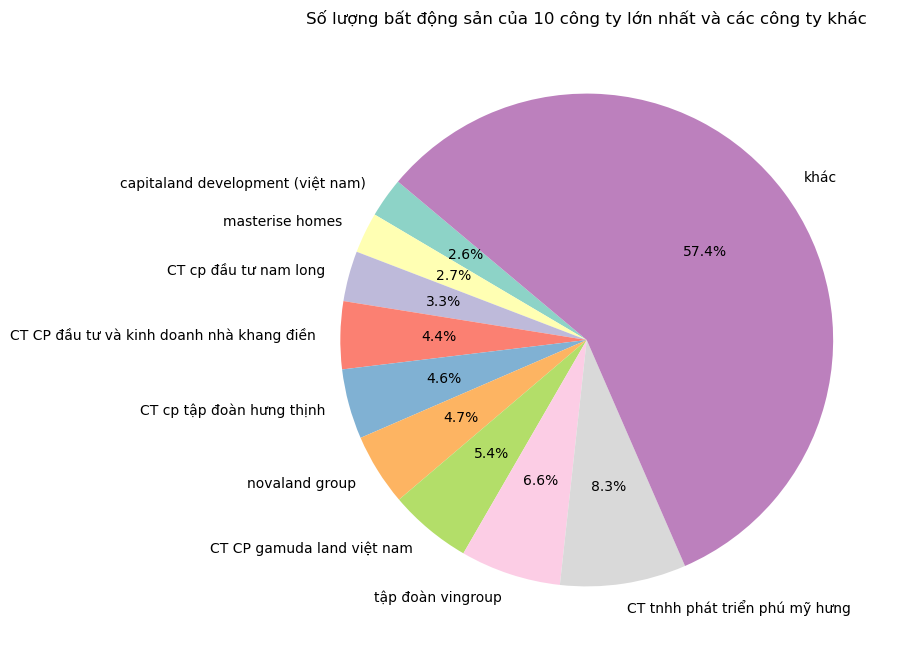

In [32]:

# 3. Phân tích các công ty
company_data = unduplicated_data[unduplicated_data["Loại Chủ Đầu Tư"] == "công ty"].copy()

company_data["Chủ Đầu Tư"] = company_data["Chủ Đầu Tư"].apply(handle_name_of_developers)

# Chuyển các chủ đầu tư có tên "đang cập nhật" vào nhóm "Khác"
company_data.loc[company_data["Chủ Đầu Tư"] == "đang cập nhật", "Chủ Đầu Tư"] = "khác"

# Đếm số lượng bất động sản của từng công ty sau khi xử lý
top_companies_updated = company_data["Chủ Đầu Tư"].value_counts()

# Đếm số lượng chủ đầu tư duy nhất
num_developers = company_data["Chủ Đầu Tư"].nunique()

# Tách 10 công ty lớn nhất (sau khi xử lý) và gộp các công ty khác
top_10_updated = top_companies_updated[:10]
others_updated = top_companies_updated[10:].sum()
top_10_updated["khác"] += others_updated

# Sắp xếp lại dữ liệu trước khi vẽ
top_10_updated = top_10_updated.sort_values(ascending=True)

# Vẽ lại biểu đồ tròn sau khi xử lý
plt.figure(figsize=(8, 8))
plt.pie(
    top_10_updated, 
    labels=top_10_updated.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette("Set3")
)

plt.title("Số lượng bất động sản của 10 công ty lớn nhất và các công ty khác")
plt.show()

In [33]:
numer_of_deverlopers = company_data["Chủ Đầu Tư"].nunique()
print (f"Số lượng các công ty/tập đoàn BDS: {numer_of_deverlopers}")

Số lượng các công ty/tập đoàn BDS: 201


**Nhận xét:**
- Dựa vào dữ liệu ta thấy rằng thị phần BDS không phân tán tập trung vào các tập đoàn lớn mà phân tán rộng khắp cho các công ty và tập đoàn
    - Có đến 201 công ty/tập đoàn BDS khác nhau trong tập dữ liệu thu thập được
    - Có hơn 57% các bất động sản thuộc các công ty/tập đoàn vừa và nhỏ
- Trong các công ty/tập đoàn BDS lớn thì Phú Mỹ Hưng, Gamuda Land, VinGroup, Novaland Group và Tập Đoàn Hưng Thịnh là các tập đoàn lớn thâu tóm số lượng lớn các bất động sản (chiếm khoảng 25% thị phần các bất động sản công ty/tập đoàn)
    - Phú Mỹ Hưng là công ty top 1 với 8.3% thị phần
    - VinGroup và Gamuda Land lần lượt chiếm vị trí thứ 2 và 3 với chỉ số 6.6% và 5.4%
    - Novaland Group và Tập Đoàn Hưng Thịnh đang mất dần thị phần qua nhiều biến cố với 4.7% và 4.6% lần lượt đứng thứ 4 và 5 


*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

## III. Sự liên hệ về giá và diện tích BDS tại thành phố Hồ Chí Minh

In [34]:
tmep = unduplicated_data.sample(20)
tmep


,Hướng nhà,Hướng ban công,Loại tin,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh,Quận,Giá Đề Xuất,Đường,Số Căn Hộ,Chủ Đầu Tư,Trạng Thái,Khu vực,Khoảng giá,Loại Chủ Đầu Tư
4421,NaN,NaN,Tin VIP Bạc,300.0,165.000,550.0,2024-10-25,NaN,NaN,quận 1,267800.000000,nguyễn cư trinh,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,Trên 100 tỷ,cá nhân/môi giới
3499,NaN,NaN,Tin thường,350.0,103.500,295.7,2024-10-24,12.0,12.0,quận 10,139200.000000,trường sơn,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,Trên 100 tỷ,cá nhân/môi giới
25231,NaN,NaN,Tin thường,72.0,4.896,68.0,2024-10-24,2.0,2.0,nhà bè,52500.000000,nguyễn hữu thọ,NaN,công ty cp địa ốc phú long,Đang mở bán,Khu vực TP.HCM,2 - 5 tỷ,công ty
15834,Đông - Nam,Tây - Bắc,Tin thường,68.9,3.400,49.3,2024-10-23,2.0,2.0,quận 9,61450.000000,võ chí công,1570.0,công ty cổ phần đầu tư và kinh doanh nhà khang...,Đã bàn giao,Khu vực Thủ Đức,2 - 5 tỷ,công ty
7904,NaN,NaN,Tin thường,410.2,155.000,377.9,2024-10-14,95.0,96.0,quận 7,80628.373016,None,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,Trên 100 tỷ,cá nhân/môi giới
2041,NaN,NaN,Tin VIP Bạc,128.0,17.792,139.0,2024-10-26,NaN,NaN,quận 2,132000.000000,mai chí thọ,NaN,công ty tnhh keppel land việt nam,"Đã bàn giao phân khu Linden, Tilia, Cove",Khu vực Thủ Đức,10 - 20 tỷ,công ty
2582,Đông - Bắc,Tây - Nam,Tin thường,105.0,5.780,55.0,2024-10-24,2.0,2.0,quận 7,93150.000000,huỳnh tấn phát,NaN,công ty tnhh keppel land việt nam,Đã bàn giao,Khu vực TP.HCM,5 - 10 tỷ,công ty
25616,NaN,NaN,Tin thường,230.0,17.000,73.9,2024-10-24,6.0,3.0,quận 12,33350.000000,tô ngọc vân,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,10 - 20 tỷ,cá nhân/môi giới
1200,NaN,NaN,Tin thường,100.0,13.500,135.0,2024-10-26,4.0,4.0,bình tân,45781.513083,None,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,10 - 20 tỷ,cá nhân/môi giới
5073,NaN,NaN,Tin VIP Bạc,1000.0,126.000,126.0,2024-10-24,4.0,3.0,bình thạnh,105035.106383,None,NaN,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,Trên 100 tỷ,cá nhân/môi giới


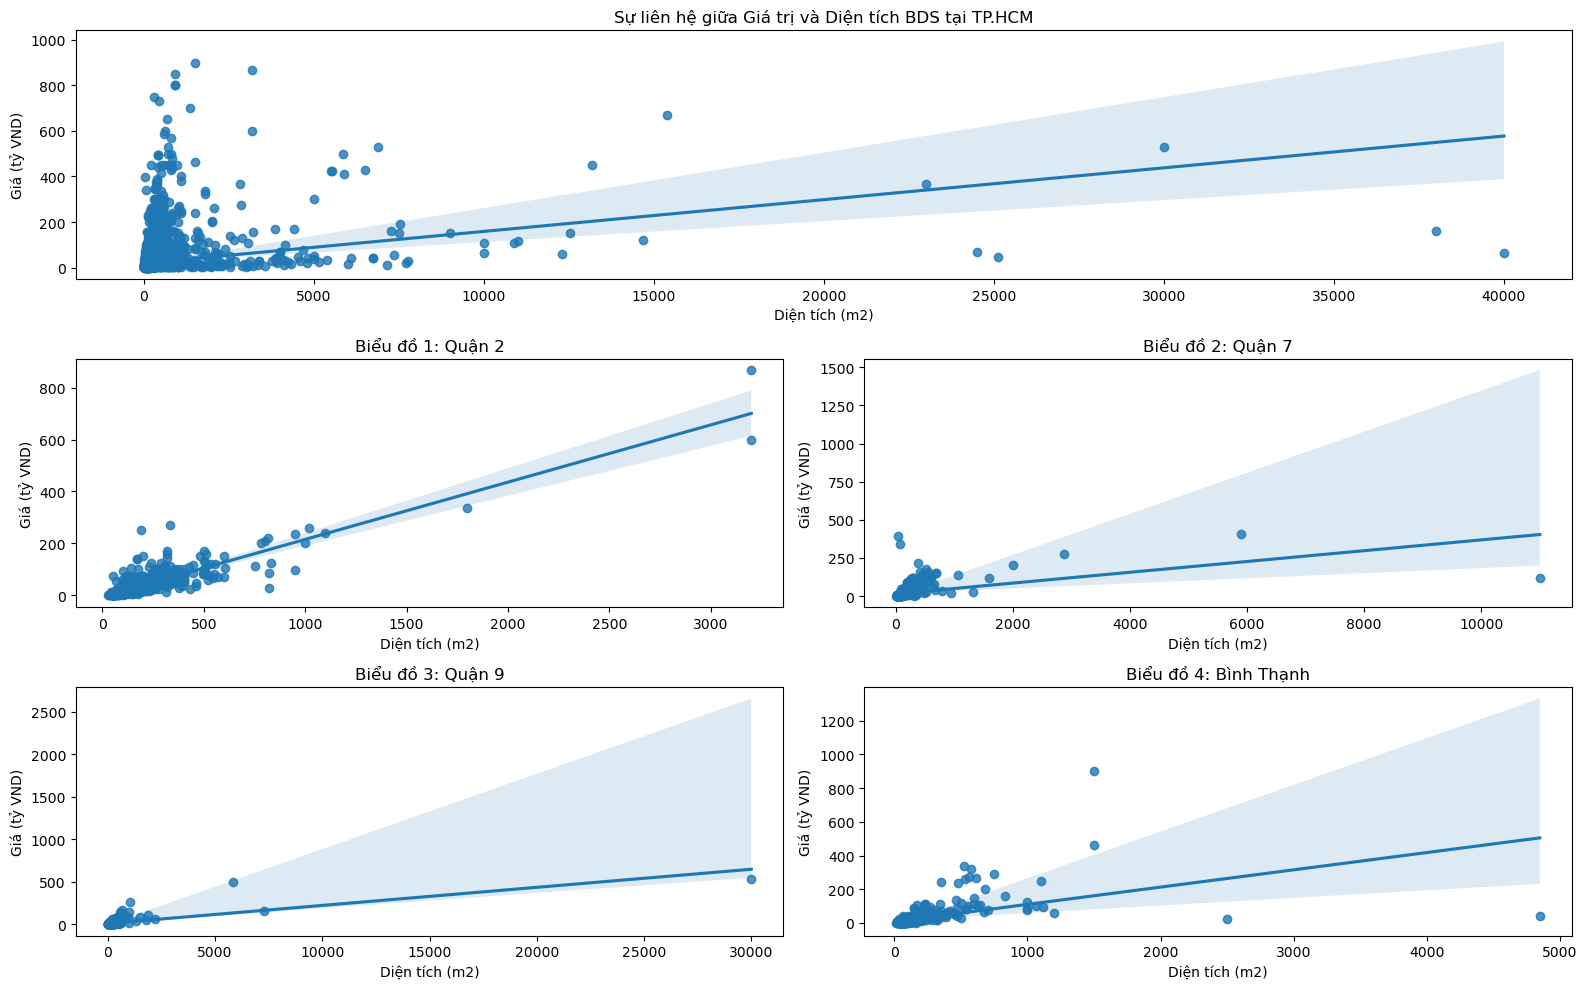

In [35]:
# Rút trích dữ liệu của một số quận để Visualization 
district_2 = unduplicated_data[unduplicated_data["Quận"] == "quận 2"]
district_7 = unduplicated_data[unduplicated_data["Quận"] == "quận 7"]
district_9 = unduplicated_data[unduplicated_data["Quận"] == "quận 9"]
district_BinhThanh = unduplicated_data[unduplicated_data["Quận"] == "bình thạnh"]


datasets = [district_2, district_7, district_9, district_BinhThanh]
district_names = ["Quận 2", "Quận 7", "Quận 9", "Bình Thạnh"]

# Tạo GridSpec để quản lý bố cục
fig = plt.figure(figsize=(16, 10))
gs = GridSpec(3, 2, figure=fig)  # 3 hàng, 2 cột

# Biểu đồ tổng thể (ở dòng đầu tiên, chiếm cả hàng)
ax_total = fig.add_subplot(gs[0, :])  # Chiếm toàn bộ dòng đầu
sns.regplot(data=unduplicated_data, x="Diện Tích", y="Giá", ax=ax_total)
ax_total.set_title('Sự liên hệ giữa Giá trị và Diện tích BDS tại TP.HCM')
ax_total.set_xlabel('Diện tích (m2)')
ax_total.set_ylabel('Giá (tỷ VND)')

# Biểu đồ cho từng quận (ở các dòng sau)
for i, (data, name) in enumerate(zip(datasets, district_names)):
    row, col = divmod(i, 2)  # Tính hàng và cột
    ax = fig.add_subplot(gs[row + 1, col])  # Bắt đầu từ dòng thứ 2
    sns.regplot(data=data, x="Diện Tích", y="Giá", ax=ax)
    ax.set_title(f'Biểu đồ {i + 1}: {name}')
    ax.set_xlabel('Diện tích (m2)')
    ax.set_ylabel('Giá (tỷ VND)')

# Tinh chỉnh bố cục
plt.tight_layout()
plt.show()



**Nhận xét:**
- Nhìn chung thuộc tính giá và diện tích có một sự tương quan thuận khá yếu
    - Điều này cho thấy ngoài diện tích thì còn nhiều yếu tố khác có ảnh hưởng đến mức giá của BDS có thể nhắc đến như: vị trí, tiện ích đi kèm,...
- Dữ liệu tại quận 2 cho thấy sự tương quan thuận về diện tích và mức giá là khác cao so với các quận còn lại
    - Tuy diện tích quận 2 là khá rộng so với mặt bằng chung, nhưng quận 2 có sự đồng đều về mức giá ở các khu vực khác nhau của quận dẫn tới sự tương quan thuận cao giữa mức giá và diện tích




*Ghi chú: Dữ liệu được thu thập từ 27/09/24 đến 31/10/24 tại trang web batdongsan.com*

# C. Hỏi các câu hỏi có ý nghĩa

## I. Cần bao nhiêu tiền để sở hữu bất động sản tại thành phố Hồ Chí Minh?

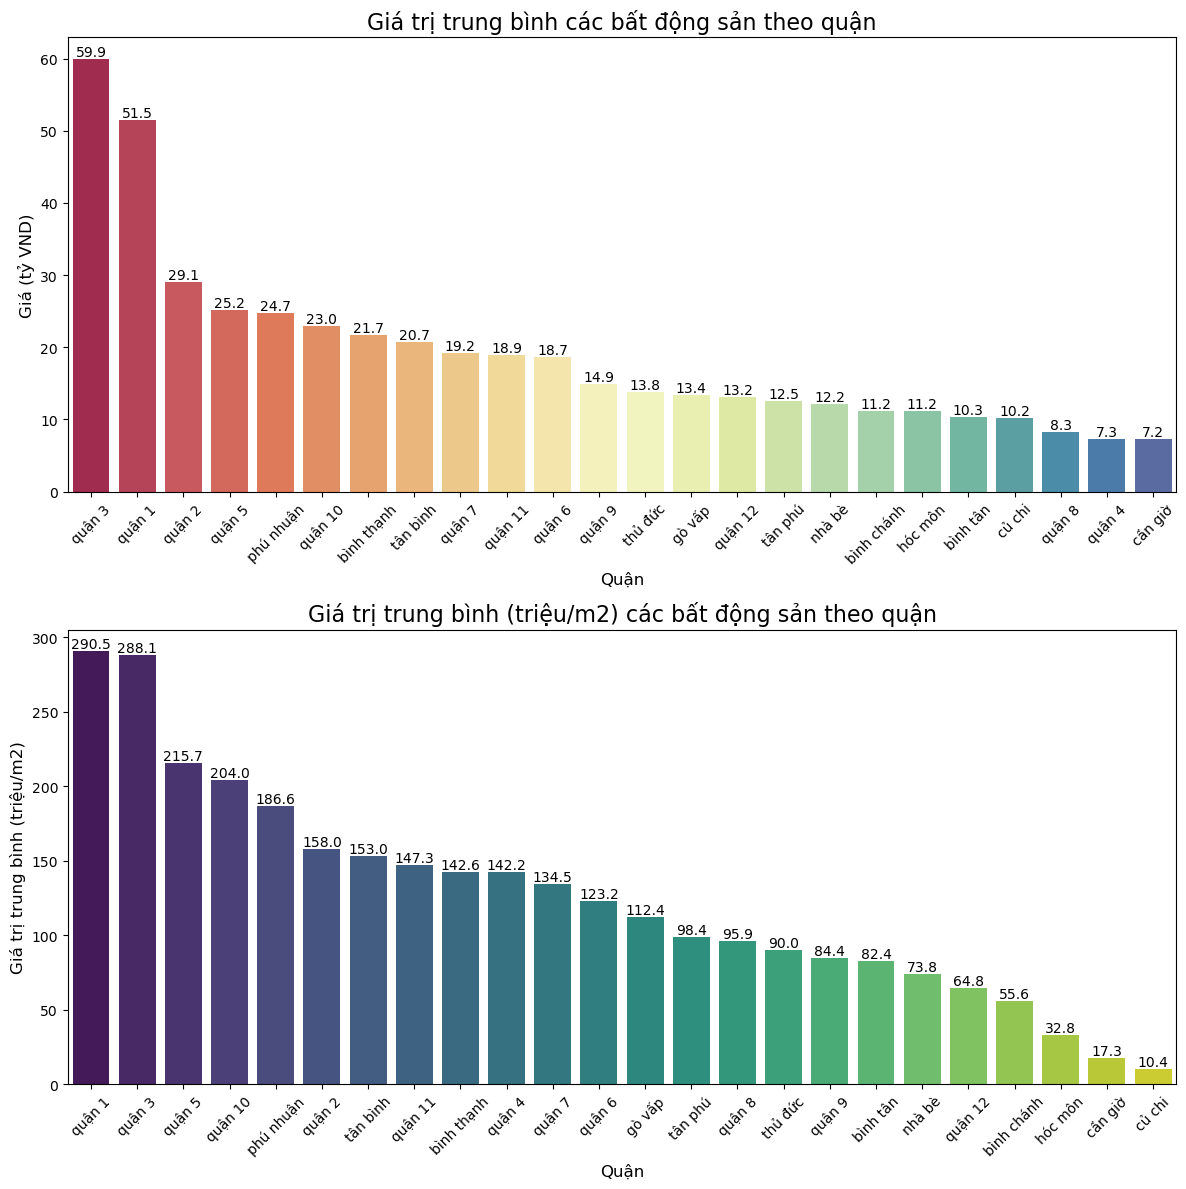

In [36]:
# Tính giá trị trung bình của Giá theo quận
avg_price_by_district = unduplicated_data.groupby("Quận")["Giá"].mean().reset_index()

# Sắp xếp giá trị trung bình của Giá theo quận giảm dần
avg_price_by_district = avg_price_by_district.sort_values("Giá", ascending=False)

# Tính giá trị trung bình của cột "Triệu/m2" theo từng quận
avg_price_per_m2_by_district = unduplicated_data.groupby("Quận")["Triệu/m2"].mean().reset_index()

# Sắp xếp giá trị trung bình của Triệu/m2 theo quận giảm dần
avg_price_per_m2_by_district = avg_price_per_m2_by_district.sort_values("Triệu/m2", ascending=False)

# Tạo một frame với 2 biểu đồ (1 trên, 1 dưới)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # 2 hàng, 1 cột

# Vẽ biểu đồ cột cho "Giá" trong subplot đầu tiên
sns.barplot(data=avg_price_by_district, x="Quận", y="Giá", ax=ax[0], palette="Spectral", hue="Quận", legend=False)
ax[0].set_title('Giá trị trung bình các bất động sản theo quận', fontsize=16)
ax[0].set_xlabel('Quận', fontsize=12)
ax[0].set_ylabel('Giá (tỷ VND)', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)

# Ghi giá trị lên các cột ở biểu đồ đầu tiên
for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)

# Vẽ biểu đồ cột cho "Triệu/m2" trong subplot thứ hai
sns.barplot(data=avg_price_per_m2_by_district, x="Quận", y="Triệu/m2", ax=ax[1], palette="viridis", hue="Quận", legend=False)
ax[1].set_title('Giá trị trung bình (triệu/m2) các bất động sản theo quận', fontsize=16)
ax[1].set_xlabel('Quận', fontsize=12)
ax[1].set_ylabel('Giá trị trung bình (triệu/m2)', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)

# Ghi giá trị lên các cột ở biểu đồ thứ hai
for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%.1f", label_type="edge", fontsize=10)

# Tinh chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét:**

- **1. Mức giá trung bình (tính theo tổng giá trị):**
    - Quận 3 và Quận 1 là hai quận có giá trung bình cao nhất, lần lượt là 59.95 tỷ và 51.51 tỷ.
    - Các khu vực có giá trung bình thấp nhất là Cần Giờ (7.22 tỷ), Quận 4 (7.28 tỷ), và Quận 8 (8.29 tỷ).
    - Như vậy, để sở hữu một bất động sản tại TP.HCM, bạn cần trung bình từ 7 tỷ đến gần 60 tỷ, tùy thuộc vào quận.
- **2. Mức giá trung bình (tính theo triệu/m²):**
    - Quận 1 có mức giá trên mỗi mét vuông cao nhất: 290.49 triệu/m², gần gấp đôi nhiều khu vực khác.
    - Các quận như Quận 3 (288.09 triệu/m²) và Quận 5 (215.71 triệu/m²) cũng nằm trong nhóm đắt đỏ.
    - Các khu vực xa trung tâm như Cần Giờ (17.30 triệu/m²) và Củ Chi (10.42 triệu/m²) có giá rẻ hơn nhiều.
    - Vì vậy, bạn cần chuẩn bị từ 10 triệu đến gần 300 triệu/m², tùy thuộc vào vị trí bất động sản.
- **3. Nhận xét tổng quan:**
    - Khu vực trung tâm (Quận 1, Quận 3): Cần ngân sách cao, với mức giá bất động sản trung bình từ 50-60 tỷ và giá đất trung bình gần 300 triệu/m².
    - Khu vực cận trung tâm (Bình Thạnh, Quận 2, Quận 10): Cần ngân sách từ 20-30 tỷ, với mức giá đất dao động từ 140-200 triệu/m².
    - Khu vực ngoại thành (Củ Chi, Cần Giờ): Đây là những lựa chọn phù hợp với ngân sách thấp hơn, từ 7-10 tỷ, và giá đất chỉ khoảng 10-20 triệu/m².
- **4. Câu trả lời tổng hợp:**
    - Ngân sách tối thiểu: Khoảng 7 tỷ đồng cho một bất động sản tại các quận ngoại thành như Cần Giờ hoặc Củ Chi.
    - Ngân sách trung bình cho khu vực trung tâm: Từ 50 tỷ đồng trở lên (hoặc hơn nếu là bất động sản lớn tại Quận 1, Quận 3).
    - Mức giá trung bình đất: Khoảng 150-300 triệu/m² cho trung tâm, và dưới 50 triệu/m² cho các khu vực xa trung tâm.
    - Nếu bạn là một người có tài chính không quá dư giả nhưng muốn ở một quận trung tâm, hãy lựa chọn quận 4 khi chỉ cách Quận 1 một cái cầu và giá trung bình chỉ từ 7.3 tỷ cho một bất động sản.

In [37]:
unduplicated_data.drop(columns=["Hướng nhà", "Hướng ban công", "Số Căn Hộ"], inplace=True)
unduplicated_data.head()

,Loại tin,Diện Tích,Giá,Triệu/m2,Ngày đăng,Số Phòng Ngủ,Số Nhà Vệ Sinh,Quận,Giá Đề Xuất,Đường,Chủ Đầu Tư,Trạng Thái,Khu vực,Khoảng giá,Loại Chủ Đầu Tư
0,Tin VIP Bạc,40.0,15.20,380.0,2024-10-17,6.0,4.0,quận 8,130400.000000,dương bá trạc,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,10 - 20 tỷ,cá nhân/môi giới
1,Tin thường,90.0,5.60,62.2,2024-10-23,3.0,2.0,quận 3,164900.000000,trường sa,công ty cp đầu tư xây dựng và kinh doanh nhà s...,đã bàn giao,Khu vực TP.HCM,5 - 10 tỷ,công ty
2,Tin VIP Kim Cương,87.0,7.00,80.5,2024-10-23,2.0,2.0,quận 1,267213.533835,None,tập đoàn hà đô,Đã bàn giao,Khu vực TP.HCM,5 - 10 tỷ,công ty
3,Tin thường,60.0,12.35,205.8,2024-10-22,4.0,NaN,quận 5,283000.000000,nguyễn trãi,cá nhân/môi giới,Đã bàn giao,Khu vực TP.HCM,10 - 20 tỷ,cá nhân/môi giới
5,Tin VIP Bạc,57.0,1.35,23.7,2024-10-17,2.0,2.0,quận 8,52700.000000,nguyễn văn linh,công ty tnhh sx tm lý khương,Đang mở bán,Khu vực TP.HCM,0 - 2 tỷ,công ty


In [44]:
sample = unduplicated_data.copy()
sample.dropna(inplace=True)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5015 entries, 0 to 30358
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Loại tin         5015 non-null   object        
 1   Diện Tích        5015 non-null   float64       
 2   Giá              5015 non-null   float64       
 3   Triệu/m2         5015 non-null   float64       
 4   Ngày đăng        5015 non-null   datetime64[ns]
 5   Số Phòng Ngủ     5015 non-null   float64       
 6   Số Nhà Vệ Sinh   5015 non-null   float64       
 7   Quận             5015 non-null   object        
 8   Giá Đề Xuất      5015 non-null   float64       
 9   Đường            5015 non-null   object        
 10  Chủ Đầu Tư       5015 non-null   object        
 11  Trạng Thái       5015 non-null   object        
 12  Khu vực          5015 non-null   object        
 13  Khoảng giá       5015 non-null   category      
 14  Loại Chủ Đầu Tư  5015 non-null   object     

In [45]:
sample['Giá Quận'] = sample["Quận"].map(
    sample.groupby("Quận")["Giá"].median()
)

# Tính giá trung vị cho từng Đường (trong từng Quận) và thêm cột "Giá Đường"
median_gia_duong = sample.groupby(["Đường", "Quận"])["Giá"].median()
sample["Giá Đường"] = sample.set_index(["Đường", "Quận"]).index.map(median_gia_duong)

In [46]:
sample.drop(columns=["Loại tin", "Ngày đăng", "Quận", "Đường", "Chủ Đầu Tư", "Trạng Thái", "Khu vực", "Khoảng giá", "Loại Chủ Đầu Tư"], inplace=True)
sample.reset_index()

,index,Diện Tích,Giá,Triệu/m2,Số Phòng Ngủ,Số Nhà Vệ Sinh,Giá Đề Xuất,Giá Quận,Giá Đường
0,0,40.0,15.20,380.0,6.0,4.0,130400.0,4.700,7.350
1,1,90.0,5.60,62.2,3.0,2.0,164900.0,8.350,5.600
2,5,57.0,1.35,23.7,2.0,2.0,52700.0,4.700,1.400
3,6,100.0,7.80,78.0,3.0,3.0,64200.0,8.190,7.900
4,7,87.0,5.95,68.4,3.0,2.0,164700.0,4.400,4.325
...,...,...,...,...,...,...,...,...,...
5010,30340,46.8,6.25,133.5,4.0,4.0,80200.0,6.000,6.250
5011,30342,162.0,6.90,42.6,10.0,10.0,67900.0,4.675,5.650
5012,30343,55.0,11.00,200.0,4.0,3.0,89300.0,12.000,8.150
5013,30356,180.0,32.00,177.8,5.0,6.0,64800.0,6.950,7.050


In [47]:
sample.to_csv("data_for_model.csv")